### Imorting Dependencies

In [2]:
# Import necessary libraries
import time # Imports the time module, which is used for measuring and managing time-related operations.
import mediapipe as mp #Imports the Mediapipe library, which provides various solutions for tasks like hand tracking, face detection, and pose estimation.
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from gtts import gTTS
language = 'en'
from pygame import mixer
from tempfile import NamedTemporaryFile

#### Exracting Landmarks Using Mediapipe

In [3]:
# Create instances of Mediapipe modules for holistic model and drawing utilities
mp_holistic = mp.solutions.holistic  # Holistic model
#  Creates an instance of the Mediapipe holistic model. This model is designed to perform 
#  holistic (full-body) pose estimation, including face, hand, and body landmarks.
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities
# Creates an instance of the drawing utilities provided by Mediapipe. This module helps in 
# drawing landmarks and connections on images or video frames.


In [4]:
mp_drawing

<module 'mediapipe.python.solutions.drawing_utils' from '/Users/krishkhadria/opt/anaconda3/envs/BYOP/lib/python3.10/site-packages/mediapipe/python/solutions/drawing_utils.py'>

In [5]:
def mediapipe_detection(image, model):
    # Convert the image from BGR to RGB color space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Make the image unwriteable to improve performance
    image.flags.writeable = False

    # Process the image using the specified Mediapipe model to make predictions
    results = model.process(image)

    # Make the image writeable again
    image.flags.writeable = True

    # Convert the image back from RGB to BGR color space as OpenCV typically works with BGR images.
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Return the processed image and the results of the prediction
    return image, results

In [6]:
def draw_landmarks(image, results):
    # Draw face connections using the face landmarks
    mp_drawing.draw_landmarks(
        image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)

    # Draw pose connections using the pose landmarks
    mp_drawing.draw_landmarks(
        image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

    # Draw left hand connections using the left hand landmarks
    mp_drawing.draw_landmarks(
        image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

    # Draw right hand connections using the right hand landmarks
    mp_drawing.draw_landmarks(
        image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections with custom styling
    mp_drawing.draw_landmarks(
        image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
        mp_drawing.DrawingSpec(color=(80, 110, 10),
                               thickness=1, circle_radius=1),
        mp_drawing.DrawingSpec(color=(80, 256, 121),
                               thickness=1, circle_radius=1)
    )

    # Draw pose connections with custom styling
    mp_drawing.draw_landmarks(
        image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(
            color=(80, 22, 10), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(80, 44, 121),
                               thickness=2, circle_radius=2)
    )

    # Draw left hand connections with custom styling
    mp_drawing.draw_landmarks(
        image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(121, 22, 76),
                               thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(121, 44, 250),
                               thickness=2, circle_radius=2)
    )

    # Draw right hand connections with custom styling
    mp_drawing.draw_landmarks(
        image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(245, 117, 66),
                               thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(245, 66, 230),
                               thickness=2, circle_radius=2)
    )

# The draw_styled_landmarks function enhances the visual representation of landmarks and connections by allowing custom styling.

In [8]:
# Open the camera
cap = cv2.VideoCapture(0)

# Set up the Mediapipe holistic model with confidence thresholds
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read the video feed
        ret, frame = cap.read()
        # Flip the frame horizontally for a more natural view
        frame = cv2.flip(frame, 1)

        # Make detections using the holistic model
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw styled landmarks on the image
        draw_styled_landmarks(image, results)

        # Display the image with landmarks on the screen
        cv2.imshow('OpenCV Feed', image)

        # Break the loop gracefully if 'q' key is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # Release the camera and close all windows
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
draw_landmarks(frame, results)

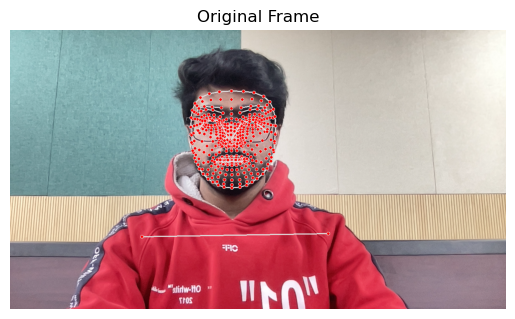

In [10]:
# Display the original frame using Matplotlib
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title('Original Frame')
plt.axis('off')  # Turn off axis labels
plt.show()

In [4]:
# Extract pose information from the detected landmarks
pose = []
for landmark in results.pose_landmarks.landmark:
    pose_info = np.array(
        [landmark.x, landmark.y, landmark.z, landmark.visibility])
    pose.append(pose_info)

In [3]:
# The code initializes an empty list pose to store pose information.
# A for loop iterates through each landmark in the results.pose_landmarks.landmark.
# For each landmark, a NumPy array pose_info is created containing the x, y, z coordinates, and visibility.
# The pose_info array is appended to the pose list.
# After the loop, the pose list contains arrays representing pose information for each detected landmark.

In [51]:
def extract_keypoints(results):
    # Extract pose landmarks or fill with zeros if no pose landmarks are found
    pose = np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility]
                    for landmark in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)

    # Extract face landmarks or fill with zeros if no face landmarks are found
    face = np.array([[landmark.x, landmark.y, landmark.z] for landmark in results.face_landmarks.landmark]).flatten(
    ) if results.face_landmarks else np.zeros(468*3)

    # Extract left hand landmarks or fill with zeros if no left hand landmarks are found
    lh = np.array([[landmark.x, landmark.y, landmark.z] for landmark in results.left_hand_landmarks.landmark]).flatten(
    ) if results.left_hand_landmarks else np.zeros(21*3)

    # Extract right hand landmarks or fill with zeros if no right hand landmarks are found
    rh = np.array([[landmark.x, landmark.y, landmark.z] for landmark in results.right_hand_landmarks.landmark]).flatten(
    ) if results.right_hand_landmarks else np.zeros(21*3)

    # Concatenate all arrays to form a single array representing all keypoints
    return np.concatenate([pose, face, lh, rh])

#### SettingUp Directories for Training Dataset 

In [52]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Path/GestureDetection')
# path where you want to create the training dataset

# Actions that we try to detect
actions = np.array(['Hello', 'Bye', 'Thanks', 'Love', 'Shoot'])

# Number of sequences (videos) for each action
no_sequences = 30

# Number of frames in each video sequence
sequence_length = 15

In [53]:
# Uncomment the code and run if you don't have a training dataset and want to create one


# # Create directories for storing video sequences for each action
# for action in actions:
#     for sequence in range(1, no_sequences + 1):
#         try:
#             os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
#         except FileExistsError:
#             # Directory already exists, so continue to the next iteration
#             continue

#### Creating Training Dataset in Real Time

In [54]:
# uncomment the code and run if you want to make new training dataset


# cap = cv2.VideoCapture(0)
# # Set up the Mediapipe holistic model with confidence thresholds
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

#     # Loop through actions
#     for action in actions:
#         # Loop through sequences (videos)
#         for sequence in range(1, no_sequences + 1):
#             # Loop through video length (sequence length)
#             for frame_num in range(sequence_length):

#                 # Read the video feed
#                 ret, frame = cap.read()

#                 # Make detections using the holistic model
#                 image, results = mediapipe_detection(frame, holistic)

#                 # Draw styled landmarks
#                 draw_styled_landmarks(image, results)

#                 # Apply wait logic for the first frame
#                 if frame_num == 0:
#                     cv2.putText(image, 'STARTING COLLECTION', (120, 200),
#                                 cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
#                                 cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(1000)
#                 else:
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
#                                 cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)

#                 # Export keypoints to numpy array
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(
#                     DATA_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)

#                 # Break the loop gracefully if 'q' key is pressed
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break

#     # Release the camera and close all windows
#     cap.release()
#     cv2.destroyAllWindows()
#     cv2.waitKey(1)

In [55]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [56]:
# Define a label map to map action labels to numerical values
label_map = {label: num for num, label in enumerate(actions)}

In [57]:
label_map

{'Hello': 0, 'Bye': 1, 'Thanks': 2, 'Love': 3, 'Shoot': 4}

In [58]:
sequences, labels = [], []
for action in actions:
    for sequence in os.listdir(os.path.join(DATA_PATH, action)):
        # Check if the sequence can be converted to an integer
        try:
            sequence = int(sequence)
            window = []
            for frame_num in range(sequence_length):
                # Load keypoints data for each frame
                res = np.load(os.path.join(DATA_PATH, action, str(
                    sequence), "{}.npy".format(frame_num)))
                window.append(res)
            sequences.append(window)
            labels.append(label_map[action])

        except ValueError:
            continue  # Skip this sequence if it can't be converted to an integer

In [59]:
len(sequences[0][1])

1662

In [60]:
X=np.array(sequences)
X.shape

(150, 15, 1662)

In [61]:
# Convert the list of labels to categorical format and then to integer type
y = to_categorical(labels).astype(int)

# Print the resulting array
print("Categorical Labels (One-Hot Encoded):")
print(y)
y.shape
y[50]

Categorical Labels (One-Hot Encoded):
[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]


array([0, 1, 0, 0, 0])

In [62]:
y.shape

(150, 5)

In [63]:
# Split the data into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (135, 15, 1662)
Shape of X_test: (15, 15, 1662)
Shape of y_train: (135, 5)
Shape of y_test: (15, 5)


#### Model Building And Training

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

In [65]:
# Specify the directory for TensorBoard logs
log_dir = os.path.join('Logs1')

# Create a TensorBoard callback
tb_callback = TensorBoard(log_dir=log_dir)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Assuming `input_shape` is the shape of your input data (e.g., (15, num_features))
input_shape = (15, 1662)
num_classes = len(actions)

# Define the LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(256, input_shape=input_shape, return_sequences=True))
model.add(Dropout(0.6))
model.add(BatchNormalization())

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.6))
model.add(BatchNormalization())

model.add(LSTM(64))
model.add(Dropout(0.6))
model.add(BatchNormalization())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))

# Compile the model with Adam optimizer, categorical crossentropy loss, and metrics for evaluation
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])


In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 15, 256)           1965056   
                                                                 
 dropout (Dropout)           (None, 15, 256)           0         
                                                                 
 batch_normalization (BatchN  (None, 15, 256)          1024      
 ormalization)                                                   
                                                                 
 lstm_4 (LSTM)               (None, 15, 128)           197120    
                                                                 
 dropout_1 (Dropout)         (None, 15, 128)           0         
                                                                 
 batch_normalization_1 (Batc  (None, 15, 128)          512       
 hNormalization)                                      

In [69]:
# Create an EarlyStopping callback to monitor training loss and stop if it doesn't improve for 10 epochs
callback = EarlyStopping(monitor='loss', patience=10)


In [70]:
# Train the model on the training data for 500 epochs with the TensorBoard callback
model.fit(X_train, y_train, epochs=300, callbacks=[tb_callback])
# The callbacks parameter is set to include the TensorBoard callback (tb_callback) for logging.

Epoch 1/300
5/5 [==============================] - 5s 70ms/step - loss: 2.0807 - accuracy: 0.2444
Epoch 2/300
5/5 [==============================] - 0s 63ms/step - loss: 2.3719 - accuracy: 0.1852
Epoch 3/300
5/5 [==============================] - 0s 62ms/step - loss: 1.9201 - accuracy: 0.2370
Epoch 4/300
5/5 [==============================] - 0s 66ms/step - loss: 2.0218 - accuracy: 0.2222
Epoch 5/300
5/5 [==============================] - 0s 66ms/step - loss: 1.9441 - accuracy: 0.2370
Epoch 6/300
5/5 [==============================] - 0s 66ms/step - loss: 1.7155 - accuracy: 0.3556
Epoch 7/300
5/5 [==============================] - 0s 64ms/step - loss: 1.8111 - accuracy: 0.2815
Epoch 8/300
5/5 [==============================] - 0s 63ms/step - loss: 1.5929 - accuracy: 0.3630
Epoch 9/300
5/5 [==============================] - 0s 61ms/step - loss: 1.6317 - accuracy: 0.3852
Epoch 10/300
5/5 [==============================] - 0s 66ms/step - loss: 1.6004 - accuracy: 0.3481
Epoch 11/300
5/5 [=

In [1]:
%tensorboard --logdir Logs1

In [72]:
# save the trained model  specify path at Path
model.save('Path/GVCmodel.h5')

In [73]:
from scipy import stats

In [74]:
colors = []
for _ in range(len(label_map)):
    num = np.random.randint(0, 256)
    colors.append((num, num,num))

 #The code generates random RGB (Red, Green, Blue) colors for each label in the label map.
# It iterates through the labels in the label map, and for each label, it generates a random 
# integer between 0 and 255 for each of the three RGB components.
# The resulting RGB tuple is appended to the 'colors' list.

In [75]:
colors

[(177, 177, 177), (85, 85, 85), (33, 33, 33), (151, 151, 151), (57, 57, 57)]

In [76]:
# Generate random RGB colors with fixed blue component for each label in the label map
colors = [(np.random.randint(0, 256), np.random.randint(0, 256), 255)
          for _ in range(len(label_map))]


def prob_viz(res, actions, input_frame, colors):
    """
    Visualize the probabilities of actions using circles on the input frame.

    Parameters:
    - res: List of probabilities for each action.
    - actions: List of action labels.
    - input_frame: Original input frame.
    - colors: List of RGB colors corresponding to each action.

    Returns:
    - output_frame: Frame with probability circles and centered labels visualized.
    """
    output_frame = input_frame.copy()

    # Iterate through probabilities and actions to visualize on the frame
    for num, prob in enumerate(res):
        # Calculate the radius based on the probability (spread in the circle)
        radius = int(prob * 50)

        # Draw filled circle as a probability indicator
        cv2.circle(output_frame, (120, 80 + num * 80), radius, colors[num], -1)

        # Add centered text label within the circle
        text_size = cv2.getTextSize(
            actions[num], cv2.FONT_HERSHEY_SIMPLEX, 1, 2)[0]
        text_x = max(120 - text_size[0] // 2, 0)
        text_y = max(80 + num * 80 + text_size[1] // 2, 0)
        cv2.putText(output_frame, actions[num], (text_x, text_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    return output_frame

#Size of the Circle (Radius): The larger the circle, the higher the probability.
#A small circle indicates a low probability, while a larger circle signifies a higher probability.
#Color of the Circle: The color of each circle is randomly assigned but remains consistent for a
# specific action. While not directly representing probability, it helps differentiate between different actions.

In [77]:
res = np.load(os.path.join(DATA_PATH, action, str(
    sequence), "{}.npy".format(frame_num)))

#  loads a NumPy array (res) from a file path constructed based on the action label,
#  sequence number, and frame number. This is commonly used in the context of loading 
# saved data, such as keypoints or features extracted from images or frames in a sequence.

#### REAL TIME TESTING

In [5]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.5

# Set up video capture
cap = cv2.VideoCapture(0)

# Set up MediaPipe Holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    mixer.init()
    # Initialize a variable to store the last spoken word
    last_spoken_word = None

    while cap.isOpened():
        # Read video feed
        ret, frame = cap.read()

        # Make detections using the Holistic model
        image, results = mediapipe_detection(frame, holistic)

        # Draw landmarks on the frame
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        # Extract keypoints from the Holistic model results
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        # Keep only the last 15 frames in the sequence
        sequence = sequence[-15:]

        # Make a prediction using the trained model
        if len(sequence) == 15:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

            # 3. Visualization logic
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

                if len(sentence) > 5:
                    sentence = sentence[-5:]

                # Visualize probabilities on the image
                image = prob_viz(res, actions, image, colors)

        # Display sentence and probabilities on the frame
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 221, 158), 2, cv2.LINE_AA)

        # Speak the recognized word using gTTS
        if sentence:
            current_word = sentence[-1]

            # Check if the current word is different from the last spoken word
            if current_word != last_spoken_word:
                last_spoken_word = current_word

                # Speak the word using gTTS
                with NamedTemporaryFile(delete=True) as temp_audio:
                    tts = gTTS(text=current_word, lang='en')
                    tts.save(f"{temp_audio.name}.mp3")
                    mixer.music.load(f"{temp_audio.name}.mp3")
                    mixer.music.play()

        # Show the frame
        cv2.imshow('OpenCV Feed', image)

        # Break out of the loop when 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # Release video capture resources
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [39]:
cap.release()